In [81]:
import copy
from queue import PriorityQueue
import itertools

# This is a static class that helps with anything specific to the eight puzzle. 
#   It can compute all possible moves for any gameboard
#   It can tell whether or not a gameboard is the goal state
#   It can find items in any gameboard. 
#   It can hash gameboards
#   It can find any item a gameboard
class EightPuzzle:
    #EightPuzzle.hash to hash values
    hash: dict = {}

    goal = [
        [1,2,3],
        [4,5,6],
        [7,8,0],
    ]

    #converts gameboard to hashable string
    @staticmethod
    def convert(gameboard: list[list[int]]):
        flat_gameboard = list(itertools.chain.from_iterable(gameboard))
        string = ""
        for i in range(len(flat_gameboard)):
            string += str(flat_gameboard[i])
        return string

    #finds the empty square in the gameboard
    @staticmethod
    def empty_square(gameboard: list[list[int]]):
        for i in range(len(gameboard)):
            for j in range(len(gameboard[0])):
                if gameboard[i][j] == 0:
                    return (i,j)
        print("no empty square found")
        return (-1,-1)

    #computes all possible moves in a gameboard
    #returns an array of gameboards
    @staticmethod
    def operators(gameboard: list[list[int]]):
        (i,j) = EightPuzzle.empty_square(gameboard)
        if i < 0 or j < 0:
            return []

        operators = []

        #move down
        if i < len(gameboard)-1:
            tempboard = copy.deepcopy(gameboard)
            tempboard[i][j], tempboard[i+1][j] = tempboard[i+1][j], tempboard[i][j]
            operators.append(tempboard)
        #move up
        if i > 0:
            tempboard = copy.deepcopy(gameboard)
            tempboard[i][j], tempboard[i-1][j] = tempboard[i-1][j], tempboard[i][j]
            operators.append(tempboard)
        #move right
        if j < len(gameboard[0])-1:
            tempboard = copy.deepcopy(gameboard)
            tempboard[i][j], tempboard[i][j+1] = tempboard[i][j+1], tempboard[i][j]
            operators.append(tempboard)
        #move left
        if j > 0:
            tempboard = copy.deepcopy(gameboard)
            tempboard[i][j], tempboard[i][j-1] = tempboard[i][j-1], tempboard[i][j]
            operators.append(tempboard)
        
        return operators

    # checks if gameboard is in the goal state
    @staticmethod
    def is_goal(gameboard) -> bool:
        return gameboard == EightPuzzle.goal

    # nicely prints the gameboard
    @staticmethod
    def print_gameboard(gameboard: list[list[int]]):
        print("[")
        for row in gameboard:
            print("\t", end="")
            for item in row:
                print(item, end=", ")
            print()
        print("]")

    # IMPORTANT: Resets the hash. Make sure to call EightPuzzle.reset_hash() whenever making a new search
    @staticmethod
    def reset_hash():
        EightPuzzle.hash.clear()

    # Finds the location of an item in the goal state
    @staticmethod
    def find(item: int) -> tuple[int, int]:
        for i in range(len(EightPuzzle.goal)):
            for j in range(len(EightPuzzle.goal[0])):
                if item == EightPuzzle.goal[i][j]:
                    return (i,j)
        raise Exception("Item doesn't exist in goal")

examples = [
    [
        [1,2,3],
        [4,5,6],
        [7,8,0],
    ],
    [
        [1,2,3],
        [4,5,6],
        [0,7,8],
    ],
    [
        [1,2,3],
        [5,0,6],
        [4,7,8],
    ],
    [
        [1,3,6],
        [5,0,2],
        [4,7,8],
    ],
    [
        [1,3,6],
        [5,0,7],
        [4,8,2],
    ],
    [
        [1,6,7],
        [5,0,3],
        [4,8,2],
    ],
    [
        [7,1,2],
        [4,8,5],
        [6,3,0],
    ],
    [
        [0,7,2],
        [4,6,1],
        [3,5,8],
    ]
]
print("Example 1:")
EightPuzzle.print_gameboard(examples[0])
print("is goal: ", EightPuzzle.is_goal(examples[0]))
print("convertion to string: ", EightPuzzle.convert(examples[0]))
print("Operators:")
for operator in EightPuzzle.operators(examples[0]):
    EightPuzzle.print_gameboard(operator)

print("---------------------------------------------------------------------")

print("Example 2:")
EightPuzzle.print_gameboard(examples[1])
print("is goal: ", EightPuzzle.is_goal(examples[1]))
print("convertion to string: ", EightPuzzle.convert(examples[1]))
print("Operators:")
for operator in EightPuzzle.operators(examples[1]):
    EightPuzzle.print_gameboard(operator)

Example 1:
[
	1, 2, 3, 
	4, 5, 6, 
	7, 8, 0, 
]
is goal:  True
convertion to string:  123456780
Operators:
[
	1, 2, 3, 
	4, 5, 0, 
	7, 8, 6, 
]
[
	1, 2, 3, 
	4, 5, 6, 
	7, 0, 8, 
]
---------------------------------------------------------------------
Example 2:
[
	1, 2, 3, 
	4, 5, 6, 
	0, 7, 8, 
]
is goal:  False
convertion to string:  123456078
Operators:
[
	1, 2, 3, 
	0, 5, 6, 
	4, 7, 8, 
]
[
	1, 2, 3, 
	4, 5, 6, 
	7, 0, 8, 
]


In [82]:
import time

# Node for Eight Puzzle
class Node:
    def __init__(self, gameboard, value, depth, parent) -> None:
        self.gameboard = gameboard
        self.value = value 
        self.depth = depth
        self.parent = parent

    #comparison function for the priority queue. f(n) = h(n) + g(n)
    def __lt__(self, other):
        return self.value + self.depth < other.value + other.depth

    #priority queue likes to print the most recent popped value. I want to prevent this
    def __repr__(self):
        return ""

    #is the node in the goal state?
    def is_goal(self):
        return EightPuzzle.is_goal(self.gameboard)

    #expand this node
    def expand(self, q: PriorityQueue, qfunc):
        qfunc(q, self, EightPuzzle.operators(self.gameboard))
    
    #print the node's gameboard
    def print_state(self):
        EightPuzzle.print_gameboard(self.gameboard)

    #Print the path to this node from the initial state
    def print_traceback(self):
        if self.parent:
            self.parent.print_traceback()
        EightPuzzle.print_gameboard(self.gameboard)
        print("------------------------------------------------------------")

#heuristic for uniform cost
def uniform_cost(operator: list[list[int]]):
    return 0

#heuristic for misplaced tile
def misplaced_tile(operator: list[list[int]]):
    num_tiles = 0
    for i in range(len(operator)):
        for j in range(len(operator[0])):
            if operator[i][j] != EightPuzzle.goal[i][j]:
                num_tiles += 1
    return num_tiles

#heuristic for manhattan distance
def manhattan_distance(operator: list[list[int]]):
    total_distance = 0
    for i in range(len(operator)):
        for j in range(len(operator[0])):
            if operator[i][j] == 0:
                continue
            goal_i, goal_j = EightPuzzle.find(operator[i][j])
            total_distance += abs(goal_i - i) + abs(goal_j - j)
    return total_distance

# Basic general A* queue function. Pass in the heuristic function that you would like to use
def a_star(q: PriorityQueue, heuristic, curr_node: Node, operators: list[list[list[int]]]):
    EightPuzzle.hash[EightPuzzle.convert(curr_node.gameboard)] = True
    for operator in operators:
        if EightPuzzle.convert(operator) not in EightPuzzle.hash:
            q.put(Node(operator, heuristic(operator), curr_node.depth+1, curr_node))

#queue function for misplaced tile. Just passes the heuristic into A*
def a_star_misplaced_tile(q: PriorityQueue, curr_node: Node, operators: list[list[list[int]]]):
    a_star(q, misplaced_tile, curr_node, operators)

#queue function for manhattan distance. Just passes the heuristic into A*
def a_star_manhattan_distance(q: PriorityQueue, curr_node: Node, operators: list[list[list[int]]]):
    a_star(q, manhattan_distance, curr_node, operators)

#queue function for uniform cost. Just passes the heuristic into A*
def a_star_uniform_cost(q: PriorityQueue, curr_node: Node, operators: list[list[list[int]]]):
    a_star(q, uniform_cost, curr_node, operators)


# Basic search for A*. Everything is kept general. I shouldn't have to touch this function for a new problem
#    output: True - print results
#    traceback: True - print state every time we pop from the queue
def search(initial_state, qfunc, heuristic, output=False, traceback=False):
    pq = PriorityQueue()

    #add initial node in with a heuristic value and an initial depth of 0
    pq.put(Node(initial_state, heuristic(initial_state), 0, None))
    num_expanded_nodes = 0
    start = time.time()
    while True:
        if pq.empty():
            #if the queue is empty, then there is no solution
            print("failure")
            return
        
        #pop the best node from the priority queue
        node = pq.get()

        if node.is_goal():
            end = time.time()
            if output:
                print('Found goal state at depth: ', node.depth)
                print('Number of expanded nodes: ', num_expanded_nodes)
                print('Time taken: ', round(end-start, 2), 's')
            return (node, num_expanded_nodes, round(end-start, 2))

        if traceback:
            print("Best state with f(n) = h(n) + g(n) = ", node.value, " + ", node.depth, " = ", node.value + node.depth, ":")
            node.print_state()
            print("-------------------------------------------------------------")

        #expand the best node to and add all the new nodes to the priority qeueue
        node.expand(pq, qfunc)

        #Note: number of nodes != number of expanded nodes
        num_expanded_nodes += 1


In [83]:
# Uniform Cost: Search on Depth 24 solution
EightPuzzle.reset_hash()
print("Uniform Cost: Search on Depth 24 solution:")
print("Initial State:")
EightPuzzle.print_gameboard(examples[7])
search(examples[7], a_star_uniform_cost, uniform_cost, output=True)
print("----------------------------------------------------------")

# Uniform Cost: Traceback on simple depth 2 example
EightPuzzle.reset_hash()
print("Uniform Cost: Traceback on simple depth 2 example")
print("Initial State:")
EightPuzzle.print_gameboard(examples[1])
(node, expanded_nodes, time_taken) = search(examples[1], a_star_uniform_cost, uniform_cost, output=True, traceback=True)
print()

print("Traceback to solution:")
node.print_traceback()


Uniform Cost: Search on Depth 24 solution:
Initial State:
[
	0, 7, 2, 
	4, 6, 1, 
	3, 5, 8, 
]
Found goal state at depth:  24
Number of expanded nodes:  228860
Time taken:  11.28 s
----------------------------------------------------------
Uniform Cost: Traceback on simple depth 2 example
Initial State:
[
	1, 2, 3, 
	4, 5, 6, 
	0, 7, 8, 
]
Best state with f(n) = h(n) + g(n) =  0  +  0  =  0 :
[
	1, 2, 3, 
	4, 5, 6, 
	0, 7, 8, 
]
-------------------------------------------------------------
Best state with f(n) = h(n) + g(n) =  0  +  1  =  1 :
[
	1, 2, 3, 
	0, 5, 6, 
	4, 7, 8, 
]
-------------------------------------------------------------
Best state with f(n) = h(n) + g(n) =  0  +  1  =  1 :
[
	1, 2, 3, 
	4, 5, 6, 
	7, 0, 8, 
]
-------------------------------------------------------------
Best state with f(n) = h(n) + g(n) =  0  +  2  =  2 :
[
	0, 2, 3, 
	1, 5, 6, 
	4, 7, 8, 
]
-------------------------------------------------------------
Best state with f(n) = h(n) + g(n) =  0  +  2 

In [84]:
# Misplaced Tile: Search on Depth 24 solution
EightPuzzle.reset_hash()
print("# Misplaced Tile: Search on Depth 24 solution:")
print("Initial State:")
EightPuzzle.print_gameboard(examples[7])
search(examples[7], a_star_misplaced_tile, misplaced_tile, output=True)
print("----------------------------------------------------------")

# Uniform Cost: Traceback on simple depth 4 example

EightPuzzle.reset_hash()
print("Uniform Cost: Traceback on simple depth 4 example:")
print("Initial State:")
EightPuzzle.print_gameboard(examples[2])
(node, expanded_nodes, time_taken) = search(examples[2], a_star_misplaced_tile, misplaced_tile, output=True, traceback=True)
print()

print("Traceback to solution:")
node.print_traceback()


# Misplaced Tile: Search on Depth 24 solution:
Initial State:
[
	0, 7, 2, 
	4, 6, 1, 
	3, 5, 8, 
]
Found goal state at depth:  24
Number of expanded nodes:  14966
Time taken:  0.57 s
----------------------------------------------------------
Uniform Cost: Traceback on simple depth 4 example:
Initial State:
[
	1, 2, 3, 
	5, 0, 6, 
	4, 7, 8, 
]
Best state with f(n) = h(n) + g(n) =  5  +  0  =  5 :
[
	1, 2, 3, 
	5, 0, 6, 
	4, 7, 8, 
]
-------------------------------------------------------------
Best state with f(n) = h(n) + g(n) =  4  +  1  =  5 :
[
	1, 2, 3, 
	0, 5, 6, 
	4, 7, 8, 
]
-------------------------------------------------------------
Best state with f(n) = h(n) + g(n) =  3  +  2  =  5 :
[
	1, 2, 3, 
	4, 5, 6, 
	0, 7, 8, 
]
-------------------------------------------------------------
Best state with f(n) = h(n) + g(n) =  2  +  3  =  5 :
[
	1, 2, 3, 
	4, 5, 6, 
	7, 0, 8, 
]
-------------------------------------------------------------
Found goal state at depth:  4
Number of exp

In [85]:
# Manhattan Distance: search on depth 24 solution
EightPuzzle.reset_hash()
print("Manhattan Distance: search on depth 24 solution:")
print("Initial State:")
EightPuzzle.print_gameboard(examples[7])
search(examples[7], a_star_manhattan_distance, manhattan_distance, output=True)
print("----------------------------------------------------------")

# Manhattan Distance: Traceback on simple depth 4 example
EightPuzzle.reset_hash()
print("Manhattan Distance: Traceback on simple depth 4 example:")
print("Initial State:")
EightPuzzle.print_gameboard(examples[2])
(node, expanded_nodes, time_taken) = search(examples[2], a_star_manhattan_distance, manhattan_distance, output=True, traceback=True)
print()

print("Traceback to solution:")
node.print_traceback()


Manhattan Distance: search on depth 24 solution:
Initial State:
[
	0, 7, 2, 
	4, 6, 1, 
	3, 5, 8, 
]
Found goal state at depth:  24
Number of expanded nodes:  1608
Time taken:  0.08 s
----------------------------------------------------------
Manhattan Distance: Traceback on simple depth 4 example:
Initial State:
[
	1, 2, 3, 
	5, 0, 6, 
	4, 7, 8, 
]
Best state with f(n) = h(n) + g(n) =  4  +  0  =  4 :
[
	1, 2, 3, 
	5, 0, 6, 
	4, 7, 8, 
]
-------------------------------------------------------------
Best state with f(n) = h(n) + g(n) =  3  +  1  =  4 :
[
	1, 2, 3, 
	0, 5, 6, 
	4, 7, 8, 
]
-------------------------------------------------------------
Best state with f(n) = h(n) + g(n) =  2  +  2  =  4 :
[
	1, 2, 3, 
	4, 5, 6, 
	0, 7, 8, 
]
-------------------------------------------------------------
Best state with f(n) = h(n) + g(n) =  1  +  3  =  4 :
[
	1, 2, 3, 
	4, 5, 6, 
	7, 0, 8, 
]
-------------------------------------------------------------
Found goal state at depth:  4
Number

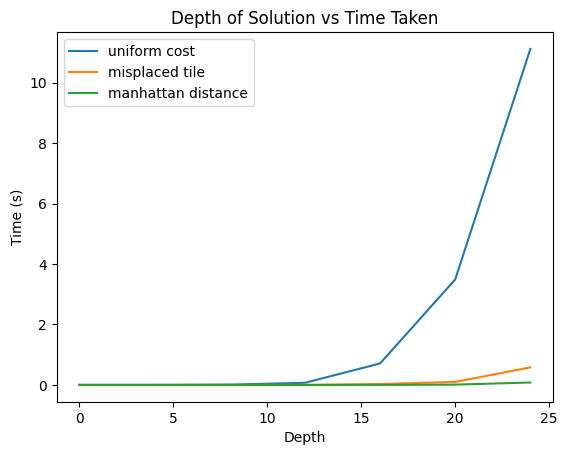

In [86]:
from matplotlib import pyplot as plt
import time

#Uniform costs
uniform_cost_depth = []
uniform_cost_times = []
uniform_cost_expansions = []
for example in examples:
    EightPuzzle.reset_hash()
    (node, expanded_nodes, time_taken)= search(example, a_star_uniform_cost, uniform_cost)
    uniform_cost_depth.append(node.depth)
    uniform_cost_times.append(time_taken)
    uniform_cost_expansions.append(expanded_nodes)
    
#Misplaced Tile costs
misplaced_tile_depth = []
misplaced_tile_times = []
misplaced_tile_expansions = []
for example in examples:
    EightPuzzle.reset_hash()
    (node, expanded_nodes, time_taken)= search(example, a_star_misplaced_tile, misplaced_tile)
    misplaced_tile_depth.append(node.depth)
    misplaced_tile_times.append(time_taken)
    misplaced_tile_expansions.append(expanded_nodes)

#Manhattan Distance costs
manhattan_distance_depth = []
manhattan_distance_times = []
manhattan_distance_expansions = []
for example in examples:
    EightPuzzle.reset_hash()
    (node, expanded_nodes, time_taken)= search(example, a_star_manhattan_distance, manhattan_distance)
    manhattan_distance_depth.append(node.depth)
    manhattan_distance_times.append(time_taken)
    manhattan_distance_expansions.append(expanded_nodes)
    

plt.plot(uniform_cost_depth, uniform_cost_times, label="uniform cost")
plt.plot(misplaced_tile_depth, misplaced_tile_times, label="misplaced tile")
plt.plot(manhattan_distance_depth, manhattan_distance_times, label="manhattan distance")
plt.xlabel('Depth')
plt.ylabel('Time (s)')
plt.title('Depth of Solution vs Time Taken')
plt.legend()
plt.show()

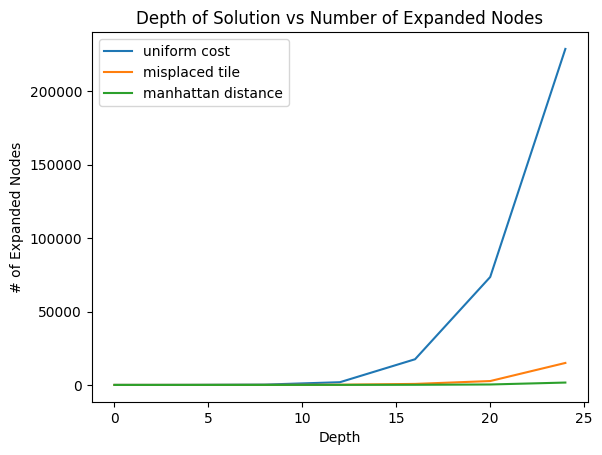

In [87]:
plt.plot(uniform_cost_depth, uniform_cost_expansions, label="uniform cost")
plt.plot(misplaced_tile_depth, misplaced_tile_expansions, label="misplaced tile")
plt.plot(manhattan_distance_depth, manhattan_distance_expansions, label="manhattan distance")
plt.xlabel('Depth')
plt.ylabel('# of Expanded Nodes')
plt.title('Depth of Solution vs Number of Expanded Nodes')
plt.legend()
plt.show()